In [1]:
import pandas as pd

In [2]:
mvps = pd.read_csv("mvps.csv")

In [3]:
mvps = mvps[["Player", "Year", "Pts Won", "Pts Max", "Share"]]

In [4]:
players = pd.read_csv("player.csv")

In [5]:
del players["Rk"]
del players["Unnamed: 0"]

In [6]:
players["Player"] = players["Player"].str.replace("*","",regex=False)

In [7]:
def single_row(df):
    if df.shape[0]==1:
        return df
    else:
        row = df[df["Tm"] == "TOT"]
        row["Tm"] = df.iloc[-1,:]["Tm"]
        return row   

In [8]:
players = players.groupby(["Player","Year"]).apply(single_row)    

In [9]:
players.index = players.index.droplevel()

In [10]:
players.index = players.index.droplevel()

In [11]:
combined = players.merge(mvps,how="outer", on = ["Player", "Year"])

In [12]:
combined[["Pts Won", "Pts Max", "Share"]] = combined[["Pts Won", "Pts Max", "Share"]].fillna(0)

In [13]:
combined[combined["Pts Won"] > 0]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
197,Al Jefferson,C,29,CHA,73,73,35.0,9.6,18.8,.509,...,2.1,0.9,1.1,1.7,2.4,21.8,2014,34.0,1250.0,0.027
346,Allen Iverson,PG,21,PHI,76,74,40.1,8.2,19.8,.416,...,7.5,2.1,0.3,4.4,3.1,23.5,1997,1.0,1150.0,0.001
348,Allen Iverson,SG,23,PHI,48,48,41.5,9.1,22.0,.412,...,4.6,2.3,0.1,3.5,2.0,26.8,1999,319.0,1180.0,0.270
349,Allen Iverson,SG,24,PHI,70,70,40.8,10.4,24.8,.421,...,4.7,2.1,0.1,3.3,2.3,28.4,2000,132.0,1210.0,0.109
350,Allen Iverson,SG,25,PHI,71,71,42.0,10.7,25.5,.420,...,4.6,2.5,0.3,3.3,2.1,31.1,2001,1121.0,1240.0,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14170,Vince Carter,SF,23,TOR,82,82,38.1,9.6,20.7,.465,...,3.9,1.3,1.1,2.2,3.2,25.7,2000,51.0,1210.0,0.042
14171,Vince Carter,SF,24,TOR,75,75,39.7,10.2,22.1,.460,...,3.9,1.5,1.1,2.2,2.7,27.6,2001,7.0,1240.0,0.006
14175,Vince Carter,SF-SG,28,NJN,77,76,36.7,9.0,20.0,.452,...,4.2,1.4,0.6,2.2,3.2,24.5,2005,3.0,1270.0,0.002
14549,Yao Ming,C,23,HOU,82,82,32.8,6.5,12.5,.522,...,1.5,0.3,1.9,2.5,3.3,17.5,2004,1.0,1230.0,0.001


In [14]:
combined

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.9,0.7,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0
1,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0
2,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0
3,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0
4,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14692,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,0.5,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0
14693,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.3,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0
14694,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.3,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0
14695,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.4,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0


In [15]:
teams = pd.read_csv("teams.csv")

In [16]:
teams = teams[~teams["W"].str.contains("Division")]

In [17]:
teams

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
...,...,...,...,...,...,...,...,...,...,...
1063,13,56,26,.683,—,115.6,109.9,5.37,2022,Memphis Grizzlies* (2)
1064,14,52,30,.634,4.0,108.0,104.7,3.12,2022,Dallas Mavericks* (4)
1065,15,36,46,.439,20.0,109.3,110.3,-0.84,2022,New Orleans Pelicans* (9)
1066,16,34,48,.415,22.0,113.2,113.0,0.02,2022,San Antonio Spurs (10)


In [18]:
teams["Team"] = teams["Team"].str.split("*").str[0]

In [19]:
teams["Team"] = teams["Team"].str.split("(").str[0]

In [20]:
teams

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics
1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers
2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks
3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
...,...,...,...,...,...,...,...,...,...,...
1063,13,56,26,.683,—,115.6,109.9,5.37,2022,Memphis Grizzlies
1064,14,52,30,.634,4.0,108.0,104.7,3.12,2022,Dallas Mavericks
1065,15,36,46,.439,20.0,109.3,110.3,-0.84,2022,New Orleans Pelicans
1066,16,34,48,.415,22.0,113.2,113.0,0.02,2022,San Antonio Spurs


In [21]:
abbrev = {}
with open("nicknames.csv") as f:
    lines =  f.readlines()
    for line in lines[1:]:
        ab,name = line.replace("\n","").split(",")
        abbrev[ab] = name

In [22]:
abbrev

{'ATL': 'Atlanta Hawks',
 'BRK': 'Brooklyn Nets',
 'BKN': 'Brooklyn Nets',
 'BOS': 'Boston Celtics',
 'CHA': 'Charlotte Bobcats',
 'CHH': 'Charlotte Hornets',
 'CHO': 'Charlotte Hornets',
 'CHI': 'Chicago Bulls',
 'CLE': 'Cleveland Cavaliers',
 'DAL': 'Dallas Mavericks',
 'DEN': 'Denver Nuggets',
 'DET': 'Detroit Pistons',
 'GSW': 'Golden State Warriors',
 'HOU': 'Houston Rockets',
 'IND': 'Indiana Pacers',
 'LAC': 'Los Angeles Clippers',
 'LAL': 'Los Angeles Lakers',
 'MEM': 'Memphis Grizzlies',
 'MIA': 'Miami Heat',
 'MIL': 'Milwaukee Bucks',
 'MIN': 'Minnesota Timberwolves',
 'NJN': 'New Jersey Nets',
 'NOH': 'New Orleans Hornets',
 'NOP': 'New Orleans Pelicans',
 'NOK': 'New Orleans/Oklahoma City Hornets',
 'NYK': 'New York Knicks',
 'OKC': 'Oklahoma City Thunder',
 'ORL': 'Orlando Magic',
 'PHI': 'Philadelphia 76ers',
 'PHX': 'Phoenix Suns',
 'PHO': 'Phoenix Suns',
 'POR': 'Portland Trail Blazers',
 'SEA': 'Seattle SuperSonics',
 'SAC': 'Sacramento Kings',
 'SAS': 'San Antonio Spu

In [23]:
combined["Team"] = combined["Tm"].map(abbrev)

In [24]:
combined.head(5)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.7,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0,Los Angeles Lakers
1,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0,Los Angeles Lakers
2,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0,Los Angeles Lakers
3,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0,Phoenix Suns
4,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0,Phoenix Suns


In [32]:
stats = combined.merge(teams,how="outer", on = ["Team", "Year"])

In [34]:
stats = stats[stats["Player"].notna()]

In [35]:
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Share,Team,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.0,Los Angeles Lakers,10.0,58,24,.707,5.0,106.3,99.6,6.73
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,.477,...,0.0,Los Angeles Lakers,10.0,58,24,.707,5.0,106.3,99.6,6.73
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,.455,...,0.0,Los Angeles Lakers,10.0,58,24,.707,5.0,106.3,99.6,6.73
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,.340,...,0.0,Los Angeles Lakers,10.0,58,24,.707,5.0,106.3,99.6,6.73
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,.492,...,0.0,Los Angeles Lakers,10.0,58,24,.707,5.0,106.3,99.6,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14692,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,.484,...,0.0,Milwaukee Bucks,7.0,42,40,.512,9.0,103.6,103.8,-0.45
14693,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,.286,...,0.0,Milwaukee Bucks,7.0,42,40,.512,9.0,103.6,103.8,-0.45
14694,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,.470,...,0.0,Milwaukee Bucks,7.0,42,40,.512,9.0,103.6,103.8,-0.45
14695,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,.459,...,0.0,Milwaukee Bucks,7.0,42,40,.512,9.0,103.6,103.8,-0.45


In [36]:
del stats["Unnamed: 0"]

In [40]:
stats = stats.apply(pd.to_numeric, errors= "ignore")

In [41]:
stats.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W          float64
L          float64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [44]:
stats["GB"] = stats["GB"].str.replace("—","0")

In [45]:
stats["GB"].unique()

array(['5.0', '14.0', '23.0', '7.0', '0', '40.0', '42.0', '18.0', '6.0',
       '24.0', '26.0', '37.0', '29.0', '21.0', '28.0', '25.0', '8.0',
       '19.0', '1.0', '13.0', '17.0', '3.0', '15.0', '9.0', '2.0', '35.0',
       '20.0', '11.0', '16.0', '41.0', '12.0', nan, '50.0', '10.0',
       '30.0', '34.0', '4.0', '1.5', '22.0', '51.0', '36.0', '43.0',
       '39.0', '18.5', '48.0', '46.0', '10.5', '32.0', '38.0', '27.0',
       '33.0', '31.0', '21.5', '45.0', '22.5', '25.5', '3.5', '20.5',
       '11.5', '44.0', '52.0', '56.0', '2.5', '12.5', '47.0', '32.5',
       '4.5'], dtype=object)

In [46]:
stats = stats.apply(pd.to_numeric, errors= "ignore")

In [48]:
stats.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W          float64
L          float64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [ ]:
stats.to_csv("PlayerMVPStats.csv")

In [51]:
highest_scoring = stats[stats["G"]>70].sort_values("PTS", ascending = False).head(10)

In [52]:
highest_scoring

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
10065,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,0.442,...,1010.0,0.768,Houston Rockets,53.0,29.0,0.646,0.0,113.9,109.1,4.96
1113,Kobe Bryant,SG,27,LAL,80,80,41.0,12.2,27.2,0.450,...,1250.0,0.386,Los Angeles Lakers,45.0,37.0,0.549,9.0,99.4,96.9,2.53
4655,Allen Iverson,PG,30,PHI,72,72,43.1,11.3,25.3,0.447,...,1250.0,0.001,Philadelphia 76ers,38.0,44.0,0.463,11.0,99.4,101.3,-2.10
10384,Michael Jordan,SG,29,CHI,78,78,39.3,12.7,25.7,0.495,...,980.0,0.577,Chicago Bulls,57.0,25.0,0.695,0.0,105.2,98.9,6.19
7166,Tracy McGrady,SG,23,ORL,75,74,39.4,11.1,24.2,0.457,...,1190.0,0.359,Orlando Magic,42.0,40.0,0.512,7.0,98.5,98.4,-0.39
6595,Kevin Durant,SF,25,OKC,81,81,38.5,10.5,20.8,0.503,...,1250.0,0.986,Oklahoma City Thunder,59.0,23.0,0.720,0.0,106.2,99.8,6.66
6647,Russell Westbrook,PG,28,OKC,81,81,34.6,10.2,24.0,0.425,...,1010.0,0.879,Oklahoma City Thunder,47.0,35.0,0.573,4.0,106.6,105.8,1.14
1127,Kobe Bryant,SG,28,LAL,77,77,40.8,10.6,22.8,0.463,...,1290.0,0.404,Los Angeles Lakers,42.0,40.0,0.512,19.0,103.3,103.4,0.24
10358,Michael Jordan,SG,27,CHI,82,82,37.0,12.1,22.4,0.539,...,960.0,0.928,Chicago Bulls,61.0,21.0,0.744,0.0,110.0,101.0,8.57
3434,LeBron James,SF,21,CLE,79,79,42.5,11.1,23.1,0.480,...,1250.0,0.550,Cleveland Cavaliers,50.0,32.0,0.610,14.0,97.6,95.4,2.17


<AxesSubplot:xlabel='Player'>

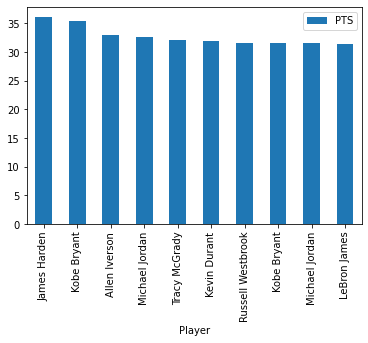

In [57]:
highest_scoring.plot.bar("Player", "PTS")

In [61]:
stats.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending = False).head(1))

,,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
Year,,,,,,,,,,,,,,,,,,,,,,
1991,10358,Michael Jordan,SG,27,CHI,82,82,37.0,12.1,22.4,0.539,...,960.0,0.928,Chicago Bulls,61.0,21.0,0.744,0.0,110.0,101.0,8.57
1992,10371,Michael Jordan,SG,28,CHI,80,80,38.8,11.8,22.7,0.519,...,960.0,0.938,Chicago Bulls,67.0,15.0,0.817,0.0,109.9,99.5,10.07
1993,10384,Michael Jordan,SG,29,CHI,78,78,39.3,12.7,25.7,0.495,...,980.0,0.577,Chicago Bulls,57.0,25.0,0.695,0.0,105.2,98.9,6.19
1994,9078,David Robinson,C,28,SAS,80,80,40.5,10.5,20.7,0.507,...,1010.0,0.723,San Antonio Spurs,55.0,27.0,0.671,3.0,100.0,94.8,5.05
1995,7643,Shaquille O'Neal,C,22,ORL,79,79,37.0,11.8,20.2,0.583,...,1050.0,0.576,Orlando Magic,57.0,25.0,0.695,0.0,110.9,103.8,6.44
1996,10962,Michael Jordan,SG,32,CHI,82,82,37.7,11.2,22.6,0.495,...,1130.0,0.986,Chicago Bulls,72.0,10.0,0.878,0.0,105.2,92.9,11.80
1997,10976,Michael Jordan,SG,33,CHI,82,82,37.9,11.2,23.1,0.486,...,1150.0,0.832,Chicago Bulls,69.0,13.0,0.841,0.0,103.1,92.3,10.70
1998,10990,Michael Jordan,SG,34,CHI,82,82,38.8,10.7,23.1,0.465,...,1160.0,0.934,Chicago Bulls,62.0,20.0,0.756,0.0,96.7,89.6,7.24
1999,999,Allen Iverson,SG,23,PHI,48,48,41.5,9.1,22.0,0.412,...,1180.0,0.270,Philadelphia 76ers,28.0,22.0,0.560,5.0,89.7,87.6,2.56


In [62]:
stats.corr()["Share"]

Age        0.018420
G          0.089176
GS         0.167169
MP         0.160854
FG         0.275277
FGA        0.247571
FG%        0.065081
3P         0.093106
3PA        0.093229
3P%        0.013697
2P         0.276305
2PA        0.251837
2P%        0.060965
eFG%       0.057892
FT         0.317906
FTA        0.323022
FT%        0.037299
ORB        0.102754
DRB        0.216642
TRB        0.189423
AST        0.199825
STL        0.173410
BLK        0.154907
TOV        0.233015
PF         0.072800
PTS        0.287186
Year      -0.009141
Pts Won    0.994986
Pts Max    0.522075
Share      1.000000
W          0.120612
L         -0.119942
W/L%       0.124441
GB        -0.099801
PS/G       0.044646
PA/G      -0.037051
SRS        0.120116
Name: Share, dtype: float64